# *SALE PRICE PREDICTION NYC SALES*

# Exam INFO284 V21
**Members: Didrik Krog, Jonas Holtan, Gunnar Gjengedal, Snorre Alvsvåg**
## Introduction
### The task
You are supposed to build at least five machine learning models from these data to predict or
classify one relevant target feature for new data points. You can choose target feature yourself, but
sales price is perhaps the most suitable. You may also reduce the number of data points somewhat
by focusing on only specific meaningful parts of the data. Or perhaps you will try dimension
reduction.

### Our Approach
This task can be split into four parts:
- **Part 1** Data Exploration
- **Part 2** Data Cleaning
- **Part 3** Model Building
- **Part 4** Presentation and Analysation

We will explore our data by conducting a *Exploratory Data Analysis*. Here we will look at the data and make note of important features, non important features, and in general inform ourselves with the data. In part 2, we will generally clean the data, remove empty or unique columns and so on. In part 3 we will start to fit the models, we will also change the data in preparation of each model. And at last we will present the results, and analyze the different approaches we took with out models.

We have chosen four supervised machine learning algorythms:
- Random Forest Regressor
- Neural Network
- Linear Reggresion (SVC)
- Gaussian Naive Bayes

one unsupervised machine learning algorythms:
- Clustering

Moving forward we will start by learing about our data

## Importing Data and Others

In [2498]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("nyc-rolling-sales.csv")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

## Presenting the Data

In [2499]:
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [2500]:
df.tail(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00
84540,8406,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,,B2,125 DARNELL LANE,...,2,0,2,3325,1300,1995,1,B2,509000,2016-10-31 00:00:00
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [2501]:
df.shape

(84548, 22)

In [2502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

As it is possible to see above, we have several different types of data that are both categorical and continous. Before creating the models necassary for this assignment, we need to convert them to the appropriate types. 

*The countinous features being :*

- SALE PRICE
- LAND SQUARE FEET
    - The land area of the property listed in square feet
    
- GROSS SQUARE FEET 
    - The total area of all the floors of a building as measured from the exterior surfaces of the outside    walls of the
      building, including the land area and space within any building or structure on the property.
      
- SALE DATE (Which will be converted to MONTH SOLD and YEAR SOLD)
    - This is going to be categorical, 'MONTH SOLD' is the month of when the property is sold. 'YEAR SOLD' is the year the
      property was sold.
    
- COMMERCIAL UNITS
    - The number of commercial units at the listed property.
    
- RESIDENTIAL UNITS 
    - The number of residential units at the listed property.
    
- TOTAL UNITS
    - The total number of units at the listed property.
    
- BLOCK
    - Because there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical 
      variable
      
- LOT
    - The same reason as 'BLOCK' feature

*The categorical features being :*

- BOROUGH
    - A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3),
      Queens (4), and Staten Island (5).
      
- NEIGHBORHOOD
    - Names of the neighboohoods that work better as a categorical feature than a numerical
    
- ZIP CODE
    - The property’s postal code.
    
- BUILDING CLASS CATEGORY
    - Easier identifiable categories of the possible types of buldings 
    
- TAX CLASS AT PRESENT
    - Every property in the city is assigned to one of four tax classes, based on the use of the property.
    
- BUILDING CLASS AT PRESENT
    - The Building Classification is used to describe a property’s constructive use. The first position of the Building Class
      is a letter that is used to describe a general class of properties. The second position, a number, adds more specific
      information about the property’s use or construction style.
      
- YEAR BUILT
    - Year the structure on the property was built.
    
- TAX CLASS AT TIME OF SALE
    - See 'TAX CLASS AT PRESENT'
    
- BUILDING CLASS AT TIME OF SALE
    - See 'BUILDING CLASS AT PRSENT'

*The features we defintely dont need is :*

- Unnamed: 0 
    - Dropping as it looks like an iterator
    
- EASE-MENT 
    - Because it only contains NaN values
    
- APARTMENT NUMBER 
    - The number of the apartment is not relevant for sale price
    
- ADDRESS
    - Address is just listed as names and will not be usefull for the sales price prediction

# Cleaning the Overall Data

In [2503]:
df = df.drop(['EASE-MENT', 'Unnamed: 0', 'APARTMENT NUMBER', "ADDRESS"], axis=1)

In [2504]:
#Checking for any duplicates

sum(df.duplicated(df.columns))

956

In [2505]:
# Removing duplicates

df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [2506]:
#Checking if there are any null values in the dataframe

df.isna().any(), df.isnull().any()

(BOROUGH                           False
 NEIGHBORHOOD                      False
 BUILDING CLASS CATEGORY           False
 TAX CLASS AT PRESENT              False
 BLOCK                             False
 LOT                               False
 BUILDING CLASS AT PRESENT         False
 ZIP CODE                          False
 RESIDENTIAL UNITS                 False
 COMMERCIAL UNITS                  False
 TOTAL UNITS                       False
 LAND SQUARE FEET                  False
 GROSS SQUARE FEET                 False
 YEAR BUILT                        False
 TAX CLASS AT TIME OF SALE         False
 BUILDING CLASS AT TIME OF SALE    False
 SALE PRICE                        False
 SALE DATE                         False
 dtype: bool, BOROUGH                           False
 NEIGHBORHOOD                      False
 BUILDING CLASS CATEGORY           False
 TAX CLASS AT PRESENT              False
 BLOCK                             False
 LOT                               False
 BU

In [2507]:
# Replacing empty or '-' values with NaN

df = df.replace(' ', np.nan)
df = df.replace(' -  ', np.nan)

In [2508]:
#An overview of where there is any NaN values

print("Percentage null or na values in Dataset\n-------------------------------------")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in Dataset
-------------------------------------


BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.88
BLOCK                              0.00
LOT                                0.00
BUILDING CLASS AT PRESENT          0.88
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  31.05
GROSS SQUARE FEET                 32.64
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        16.84
SALE DATE                          0.00
dtype: float64

### Removing some of the features

Before further inspections, we decided to remove some more of the features. These are:

- "ZIP CODE" : Not relevant

- "BLOCK" : Not relevant

- "LOT" : Not relvant

In [2509]:
df = df.drop(['ZIP CODE', 'BLOCK', 'LOT'], axis=1)

## Cleaning Sale Price

In [2510]:
#Dropping all the NaN values

df = df.dropna(subset=['SALE PRICE'])

In [2511]:
#Converting ['SALE PRICE'] from object to float

df["SALE PRICE"] = df["SALE PRICE"].astype(float)

In [2512]:
df['SALE PRICE'].describe()

count    6.951800e+04
mean     1.281950e+06
std      1.143759e+07
min      0.000000e+00
25%      2.300000e+05
50%      5.345810e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [2513]:
#Checking how the values look

df['SALE PRICE'].value_counts().head(10)

0.0         9978
10.0         746
450000.0     426
550000.0     416
650000.0     413
600000.0     409
700000.0     382
400000.0     377
750000.0     376
500000.0     350
Name: SALE PRICE, dtype: int64

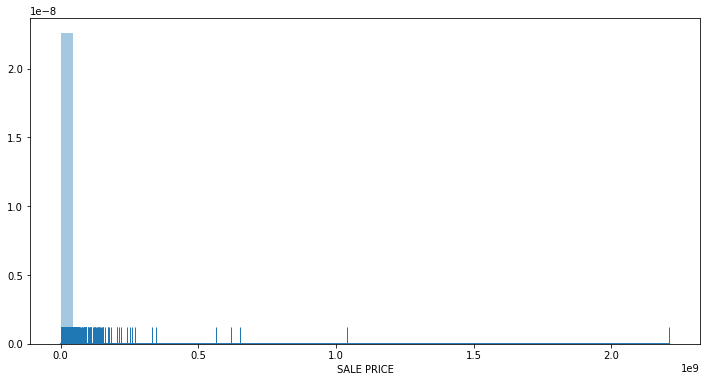

In [2514]:
# Making a diagram to get a clearer view of how 'SALE PRICE' is distributed

plt.figure(figsize=(12,6))
sns.distplot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

In [2515]:
# This shows that around 18% of the values are either greater than 10.000.000 or less than 10.000. 

df[(df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 3000000)]['SALE PRICE'].count() /len(df) 

0.22136712793808797

In [2516]:
# We than remove the values that are either greater than 1.000.000 or less than 10.000 to get a better distributed feature

df= df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE']<3000000)]

In [2517]:
df['SALE PRICE'].value_counts().head(10)

450000.0    426
550000.0    416
650000.0    413
600000.0    409
700000.0    382
400000.0    377
750000.0    376
500000.0    350
300000.0    348
350000.0    341
Name: SALE PRICE, dtype: int64

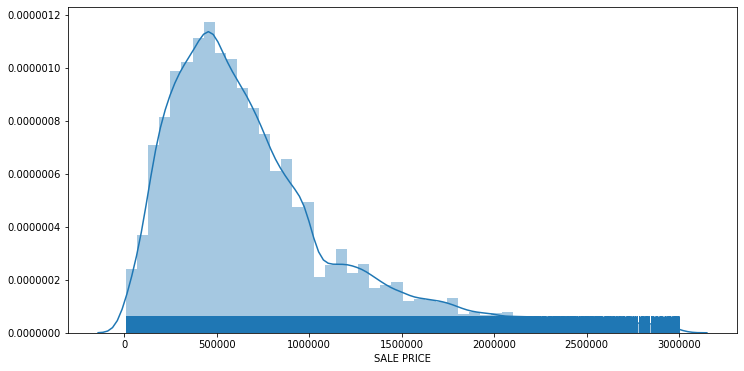

In [2518]:
plt.figure(figsize=(12,6))
sns.distplot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

## Cleaning Square Feet

There are a lot of missing values in these features.
We can either fill them up with the mean average or remove them like this:

For the time being, lets remove this missing features

In [2519]:
#Dropping all the NaN values

df = df.dropna(subset=['LAND SQUARE FEET'])
df = df.dropna(subset=['GROSS SQUARE FEET'])

In [2520]:
#Converting from object to float

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(float)

In [2521]:
df['LAND SQUARE FEET'].value_counts().head(10)

0.0       7854
2000.0    2303
2500.0    2028
4000.0    1820
1800.0     754
3000.0     734
5000.0     549
2400.0     327
1900.0     303
6000.0     271
Name: LAND SQUARE FEET, dtype: int64

In [2522]:
df['GROSS SQUARE FEET'].value_counts().head(10)

0.0       8256
1800.0     242
1600.0     235
1440.0     232
2400.0     229
2000.0     221
1200.0     200
1280.0     188
3000.0     173
1224.0     164
Name: GROSS SQUARE FEET, dtype: int64

In [2523]:
df = df[df['LAND SQUARE FEET'] > 10]

In [2524]:
df = df[df['GROSS SQUARE FEET'] > 10]

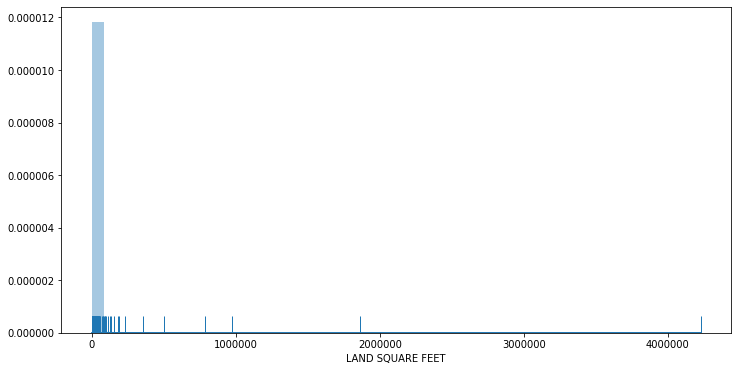

In [2525]:
plt.figure(figsize=(12,6))
sns.distplot(df['LAND SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

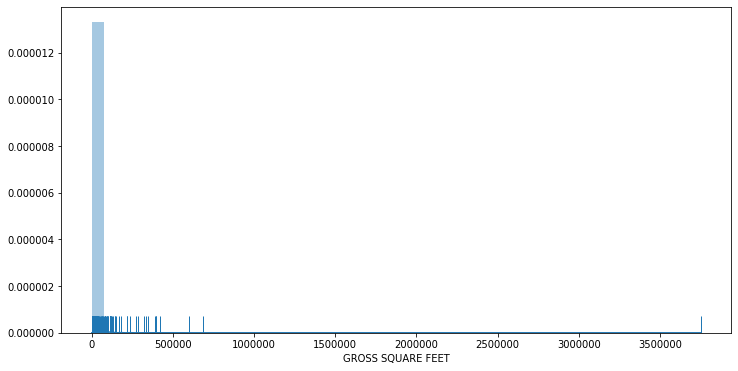

In [2526]:
plt.figure(figsize=(12,6))
sns.distplot(df['GROSS SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

As it is possible to see from the diagrams and value_counts(), there are a lot of outliners in these features. 
These have to be cleaned later.

In [2527]:
df = df[df['LAND SQUARE FEET'] < 20000]

In [2528]:
df = df[df['GROSS SQUARE FEET'] < 20000]

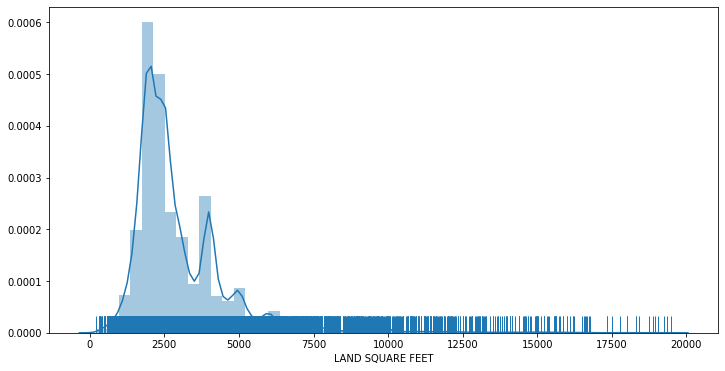

In [2529]:
plt.figure(figsize=(12,6))
sns.distplot(df['LAND SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

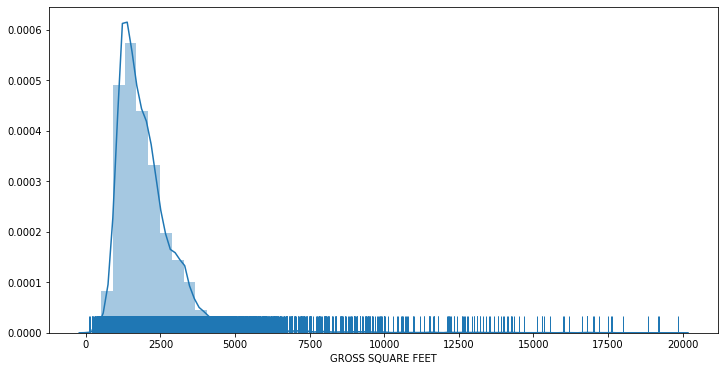

In [2530]:
plt.figure(figsize=(12,6))
sns.distplot(df['GROSS SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

## Cleaning Sale Date

In [2531]:
df['SALE DATE'].value_counts().head()

# TimeStamp types are hard to work with. Therefore, we make the 'SALE DATE' feature to two distinct features 'YEAR SOLD' and
# 'MONTH SOLD'. These two features can help us later in further analysis of the data

2017-04-28 00:00:00    183
2016-09-30 00:00:00    175
2017-02-28 00:00:00    173
2016-12-22 00:00:00    171
2016-10-28 00:00:00    169
Name: SALE DATE, dtype: int64

In [2532]:
# Making a list with alle the different months 

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [2533]:
# Spliting Sale Date into to features, one for Month Sold and one for Year Sold. 
# This is first for making a TimeStamp feature easier to use, and for calculating 
# which month or year had the highest sales rate

df['YEAR SOLD'] = [int(n[0:4]) for n in df['SALE DATE']]
df['MONTH SOLD'] = [int(n[5:7]) for n in df['SALE DATE']]
df = df.drop(['SALE DATE'], axis=1)

Text(0.5, 1.0, 'Number of properties sold by year')

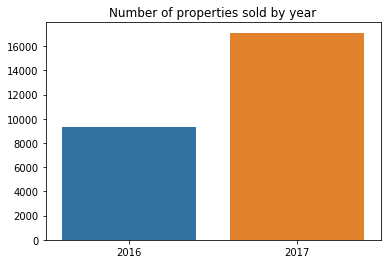

In [2534]:
plt.hist(df['YEAR SOLD'], bins=2, color='c')
counts_per_year = [sum(df['YEAR SOLD'] == 2016), sum(df['YEAR SOLD'] == 2017)]
sns.barplot([2016, 2017], counts_per_year).set_title('Number of properties sold by year')

Text(0.5, 1.0, 'Number of properties sold by month')

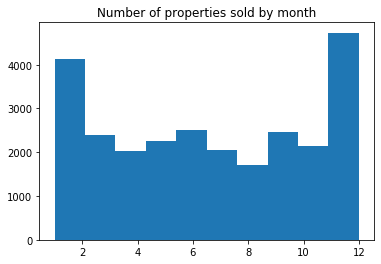

In [2535]:
plt.hist(df['MONTH SOLD'])
plt.title('Number of properties sold by month')

The first diagram shows that there were significant more houses sold in 2017 than in 2016, showing an increase that may indicate an even bigger increase in a predictive model for 2018

Its also possible to see big difference in the months january and december, compared to other months.

In [2536]:
# Transforming to more appriopriate types

df['MONTH SOLD'] = df['MONTH SOLD'].astype('category')

In [2537]:
# Transforming to more appriopriate types

df['YEAR SOLD'] = df['YEAR SOLD'].astype('category')

## Cleaning Tax Class

In [2538]:
#Dropping all the NaN values

df = df.dropna(subset=['TAX CLASS AT PRESENT'])

In [2539]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    24242
2     1435
4      764
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [2540]:
# Tax classes, as mentioned earlier, should be categorical classes. Therefore, it is more appropriate to
# replace the values to more informative values as shown below

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].replace({1:'Class_1',
                                                                           2:'Class_2',
                                                                           4:'Class_4'})

In [2541]:
df['TAX CLASS AT PRESENT'].value_counts()

1     24245
2A     1113
4       763
2B      236
2        83
2C        1
Name: TAX CLASS AT PRESENT, dtype: int64

In [2542]:
# Tax classes, as mentioned earlier, should be categorical classes. Therefore, it is more appropriate to
# replace the values to more informative values as shown below

df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].replace({'1':'Class_1',
                                                                 '1A':'Class_1',
                                                                 '1B':'Class_1',
                                                                 '1C':'Class_1',
                                                                 '2':'Class_2',
                                                                 '2A':'Class_2',
                                                                 '2B':'Class_2',
                                                                 '2C':'Class_2',
                                                                 '3':'Class_3',
                                                                 '4':'Class_4'})

In [2543]:
# Converting the features to more appropiate types

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

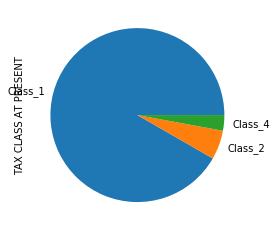

In [2544]:
df['TAX CLASS AT PRESENT'].value_counts().plot(kind='pie')

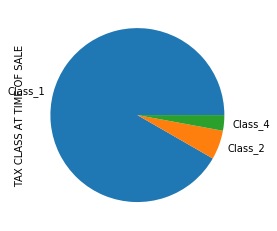

In [2545]:
df['TAX CLASS AT TIME OF SALE'].value_counts().plot(kind='pie')

These pie charts show that more the 3/4 of all the values in the features belong to class_1. 

## Cleaning Buliding Class

In [2546]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

A1    4663
A5    3964
B2    3111
B1    2714
B3    2444
C0    2239
A2    1939
A9     969
B9     913
C3     526
S2     408
C2     356
A0     281
A3     218
S1     201
C1     162
K4     123
K1     122
S9      91
A4      74
A6      73
S3      65
C5      57
S4      56
E1      53
K2      52
G2      42
S5      41
C7      40
G1      39
      ... 
I5       3
P5       3
C6       3
P2       3
W2       2
GW       2
F2       2
G8       2
I7       2
P9       2
A7       2
G5       2
I9       2
W4       1
N2       1
GU       1
L9       1
HR       1
K7       1
H4       1
P6       1
W8       1
M4       1
Z0       1
D1       1
H8       1
M3       1
L8       1
V1       1
D4       1
Name: BUILDING CLASS AT TIME OF SALE, Length: 86, dtype: int64

In [2547]:
# Converting the features to more appropiate types

df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [2548]:
df['BUILDING CLASS AT PRESENT'].value_counts()

A1    4668
A5    3977
B2    3117
B1    2718
B3    2448
C0    2238
A2    1914
A9     954
B9     914
C3     523
S2     407
C2     356
A0     305
A3     218
S1     201
C1     162
K4     123
K1     122
S9      91
A6      73
A4      73
S3      65
S4      56
C5      56
E1      53
K2      52
G2      43
S5      41
C7      40
G1      37
      ... 
P2       3
GW       3
I5       3
HR       3
W3       3
P5       3
I9       2
W2       2
I7       2
G5       2
F2       2
P9       2
A7       2
G8       2
L9       1
GU       1
N2       1
L8       1
W4       1
K7       1
D4       1
D3       1
Z0       1
P6       1
H8       1
M3       1
D6       1
D1       1
M4       1
W8       1
Name: BUILDING CLASS AT PRESENT, Length: 85, dtype: int64

As it is possible to se above, 'BUILDING CLASS AT TIME OF SALE' and 'BUILDING CLASS CATEGORY' is almost the same. We might remove one of them to prevent having to many features.

In [2549]:
#Dropping the unecessary feature

df = df.drop(['BUILDING CLASS AT PRESENT'], axis=1)

In [2550]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                        12390
02 TWO FAMILY DWELLINGS                         9590
03 THREE FAMILY DWELLINGS                       2239
07 RENTALS - WALKUP APARTMENTS                  1177
22 STORE BUILDINGS                               310
14 RENTALS - 4-10 UNIT                           253
29 COMMERCIAL GARAGES                            111
21 OFFICE BUILDINGS                              107
30 WAREHOUSES                                     94
27 FACTORIES                                      51
37 RELIGIOUS FACILITIES                           43
33 EDUCATIONAL FACILITIES                         12
05 TAX CLASS 1 VACANT LAND                        12
06 TAX CLASS 1 - OTHER                            11
35 INDOOR PUBLIC AND CULTURAL FACILITIES           9
41 TAX CLASS 4 - OTHER                             9
32 HOSPITAL AND HEALTH FACILITIES                  7
38 ASYLUMS AND HOMES                               5
26 OTHER HOTELS                               

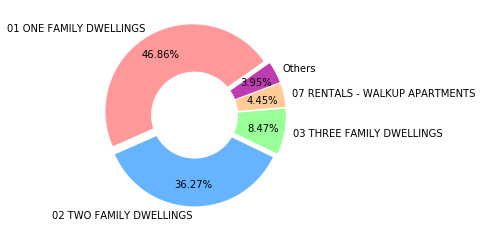

In [2551]:
property_types = {'01 ONE FAMILY DWELLINGS': 12390,
 '02 TWO FAMILY DWELLINGS': 9590,
 '03 THREE FAMILY DWELLINGS': 2239,
 '07 RENTALS - WALKUP APARTMENTS': 1177,
 'Others' : 1045}                         # 'Others' here is the sum of fifth - 28th value given above

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 5))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

From the value_count() and Pie Chart above, we can observe that the first four values stands out the most and the rest should rather be one value to remove a lot of outliners. This might be clever to clean.

In [2552]:
# Converting the features to more appropiate types

df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')

In [2553]:
buildinglist = []

for i in df['BUILDING CLASS CATEGORY']:
    if i == '01 ONE FAMILY DWELLINGS':
        buildinglist.append(i)
        print(buildinglist)

In [2554]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                        12390
02 TWO FAMILY DWELLINGS                         9590
03 THREE FAMILY DWELLINGS                       2239
07 RENTALS - WALKUP APARTMENTS                  1177
22 STORE BUILDINGS                               310
14 RENTALS - 4-10 UNIT                           253
29 COMMERCIAL GARAGES                            111
21 OFFICE BUILDINGS                              107
30 WAREHOUSES                                     94
27 FACTORIES                                      51
37 RELIGIOUS FACILITIES                           43
33 EDUCATIONAL FACILITIES                         12
05 TAX CLASS 1 VACANT LAND                        12
06 TAX CLASS 1 - OTHER                            11
35 INDOOR PUBLIC AND CULTURAL FACILITIES           9
41 TAX CLASS 4 - OTHER                             9
32 HOSPITAL AND HEALTH FACILITIES                  7
38 ASYLUMS AND HOMES                               5
09 COOPS - WALKUP APARTMENTS                  

## Cleaning Borough

In [2555]:
df['BOROUGH'].value_counts()

4    10520
3     7679
5     4851
2     3193
1      198
Name: BOROUGH, dtype: int64

In [2556]:
# Change borough index to borough real name in New York City

df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\Users\Eier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [2557]:
df['BOROUGH'] = df['BOROUGH'].astype('category')

Text(0.5, 1.0, 'Sales per Borough')

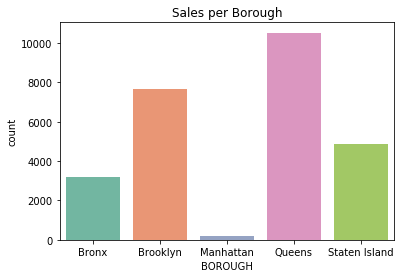

In [2558]:
sns.countplot('BOROUGH',data=df,palette='Set2')
plt.title('Sales per Borough')

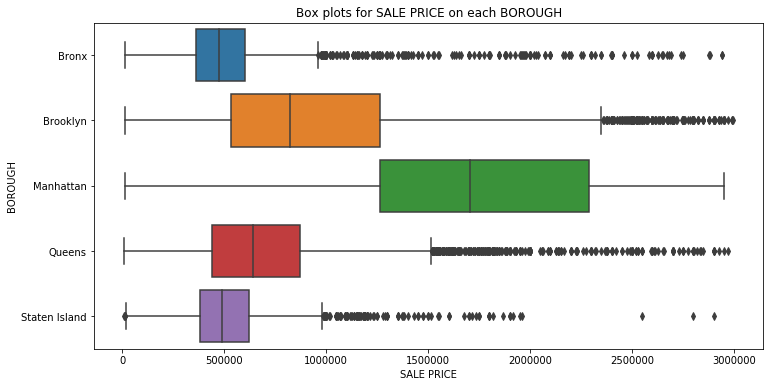

In [2559]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

## Cleaning Year Built

In [2560]:
df['YEAR BUILT'].head(10)

222     1901
223     1901
224     1901
277     1850
1080    1915
4173    1901
4199    1900
4800    1910
4801    1910
4805    1901
Name: YEAR BUILT, dtype: int64

In [2561]:
df['YEAR BUILT'].unique()

array([1901, 1850, 1915, 1900, 1910, 1899, 1998, 1914, 1909, 2000, 1930,
       1890, 1929, 1939, 1920, 1996, 1926, 1924, 1921, 1925, 2013, 1896,
       1911, 1995, 1931, 2006, 2004, 2005, 2003, 1997, 1912, 1945, 1950,
       1940, 1955, 1935, 1965, 1960, 1963, 2015, 1961, 1932, 1959, 1952,
       1951, 2007, 1970, 1956, 2008, 1975, 1964, 1957, 1999, 1987, 1988,
       1989, 1977, 1973, 1962, 2001, 1990, 1927, 1981, 1936, 1967, 1916,
       1923, 1906, 1907, 1913, 2016, 2002, 1969, 2011, 1905, 1991, 1985,
       1908, 1902, 1903, 1993, 1994, 1980, 1966, 1928, 1941, 1942, 1937,
       1958, 2009, 1919, 1992, 1968, 1953, 1934, 1982, 1904, 1954, 1917,
       1948, 1947, 2010, 1986, 1972, 1974, 1933, 2014, 1938, 1984, 1949,
       1922, 1800, 2012, 1979, 1944, 1918, 1847, 1880, 1895,    0, 1971,
       1946, 1983, 1976, 1978, 1870, 1891, 1881, 1943, 2017], dtype=int64)

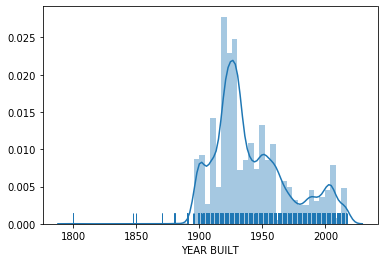

In [2562]:
df=df[df['YEAR BUILT']!=0]
sns.distplot(df['YEAR BUILT'], bins=50, rug=True)
plt.show()

In [2563]:
#As its possible to se from the graph above, there are some outliners from 1800 - 1900. We can remove these.

df= df[(df['YEAR BUILT'] > 1880)]

In [2564]:
#Converting the feature to a more appropriate type

df['YEAR BUILT'] = df['YEAR BUILT'].astype('category')

## Cleaning "... Units"

In [2565]:
df['RESIDENTIAL UNITS'].value_counts()

1     12468
2      9687
3      2310
0       631
4       617
6       323
5       109
8        84
7        48
9        39
10       27
12       18
16       14
11       12
15        9
14        6
13        5
20        4
19        3
17        2
36        1
22        1
18        1
25        1
28        1
21        1
Name: RESIDENTIAL UNITS, dtype: int64

In [2566]:
df['COMMERCIAL UNITS'].value_counts()

0       24756
1        1320
2         211
3          76
4          30
6          11
5          10
7           3
14          1
9           1
8           1
21          1
2261        1
Name: COMMERCIAL UNITS, dtype: int64

In [2567]:
#Dropping total units because its only the sum of 'RESIDENTIAL UNITS' and 'COMMERCIAL UNITS'

df = df.drop(['TOTAL UNITS'], axis=1)

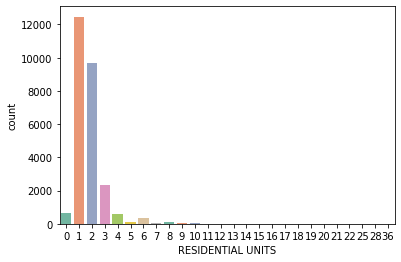

In [2568]:
sns.countplot('RESIDENTIAL UNITS',data=df,palette='Set2')

In [2569]:
df= df[(df['RESIDENTIAL UNITS'] < 10)]

In [2570]:
df= df[(df['COMMERCIAL UNITS'] < 7)]

## Cleaning Neighborhood

In [2571]:
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')

## Overview

In [2572]:
#df.head(10)

In [2573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26309 entries, 222 to 84547
Data columns (total 14 columns):
BOROUGH                           26309 non-null category
NEIGHBORHOOD                      26309 non-null category
BUILDING CLASS CATEGORY           26309 non-null category
TAX CLASS AT PRESENT              26309 non-null category
RESIDENTIAL UNITS                 26309 non-null int64
COMMERCIAL UNITS                  26309 non-null int64
LAND SQUARE FEET                  26309 non-null float64
GROSS SQUARE FEET                 26309 non-null float64
YEAR BUILT                        26309 non-null category
TAX CLASS AT TIME OF SALE         26309 non-null category
BUILDING CLASS AT TIME OF SALE    26309 non-null category
SALE PRICE                        26309 non-null float64
YEAR SOLD                         26309 non-null category
MONTH SOLD                        26309 non-null category
dtypes: category(9), float64(3), int64(2)
memory usage: 1.5 MB


In [2574]:
df.shape

(26309, 14)

## Data Preprocessing, Making Categorical Data more Appropriate

In [2575]:
cluster_df = df.drop(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'YEAR BUILT',
                     'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'YEAR SOLD', 'MONTH SOLD',
                     'RESIDENTIAL UNITS', 'COMMERCIAL UNITS'], axis=1)

In [2576]:
print(cluster_df.shape)
cluster_df.head()

(26309, 3)


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
222,1566.0,6330.0,1583840.0
223,1566.0,6330.0,416790.0
224,1566.0,6330.0,630370.0
1080,1098.0,2712.0,2700000.0
4173,384.0,1152.0,1375000.0


In [2577]:
df['BOROUGH'].unique()

[Manhattan, Bronx, Brooklyn, Queens, Staten Island]
Categories (5, object): [Manhattan, Bronx, Brooklyn, Queens, Staten Island]

In [2578]:
df['TAX CLASS AT PRESENT'].unique()

[Class_2, Class_4, Class_1]
Categories (3, object): [Class_2, Class_4, Class_1]

In [2579]:
df['TAX CLASS AT TIME OF SALE'].unique()

[Class_2, Class_4, Class_1]
Categories (3, object): [Class_2, Class_4, Class_1]

In [2580]:
df['BUILDING CLASS CATEGORY'].unique()

[07 RENTALS - WALKUP APARTMENTS, 22 STORE BUILDINGS, 01 ONE FAMILY DWELLINGS, 02 TWO FAMILY DWELLINGS, 03 THREE FAMILY DWELLINGS, ..., 33 EDUCATIONAL FACILITIES, 38 ASYLUMS AND HOMES, 31 COMMERCIAL VACANT LAND, 35 INDOOR PUBLIC AND CULTURAL FACILITIES, 08 RENTALS - ELEVATOR APARTMENTS]
Length: 22
Categories (22, object): [07 RENTALS - WALKUP APARTMENTS, 22 STORE BUILDINGS, 01 ONE FAMILY DWELLINGS, 02 TWO FAMILY DWELLINGS, ..., 38 ASYLUMS AND HOMES, 31 COMMERCIAL VACANT LAND, 35 INDOOR PUBLIC AND CULTURAL FACILITIES, 08 RENTALS - ELEVATOR APARTMENTS]

In [2581]:
df['YEAR SOLD'].unique()

[2017, 2016]
Categories (2, int64): [2017, 2016]

In [2582]:
one_hot_features = ['BOROUGH', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY', 'YEAR SOLD']

label_features = ['NEIGHBORHOOD', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'YEAR BUILT', 'MONTH SOLD']

In [2583]:
#One Hot Encoding with dummies to make categorical values possible to use in our models

one_hot_encoded = pd.get_dummies(df[one_hot_features])

df = df.drop(one_hot_features, axis = 1)

df = pd.concat([df, one_hot_encoded], axis=1)

In [2584]:
df['NEIGHBORHOOD'].unique()

[CHELSEA, CHINATOWN, GREENWICH VILLAGE-WEST, HARLEM-CENTRAL, HARLEM-EAST, ..., TRAVIS, WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]
Length: 226
Categories (226, object): [CHELSEA, CHINATOWN, GREENWICH VILLAGE-WEST, HARLEM-CENTRAL, ..., WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]

In [2585]:
label_encoder = LabelEncoder()

df['NEIGHBORHOOD'] = label_encoder.fit_transform(df['NEIGHBORHOOD'])

In [2586]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

[C4, K4, A5, C2, A4, ..., GU, W8, H8, Z0, M3]
Length: 82
Categories (82, object): [C4, K4, A5, C2, ..., W8, H8, Z0, M3]

In [2587]:
label_encoder_2 = LabelEncoder()

df['BUILDING CLASS AT TIME OF SALE'] = label_encoder_2.fit_transform(df['BUILDING CLASS AT TIME OF SALE'])

In [2588]:
df['YEAR BUILT'].unique()

[1901, 1915, 1900, 1910, 1899, ..., 1978, 1891, 1881, 1943, 2017]
Length: 123
Categories (123, int64): [1901, 1915, 1900, 1910, ..., 1891, 1881, 1943, 2017]

In [2589]:
label_encoder_3 = LabelEncoder()

df['YEAR BUILT'] = label_encoder_3.fit_transform(df['YEAR BUILT'])

In [2590]:
df['MONTH SOLD'].unique()

[8, 1, 10, 5, 11, ..., 9, 2, 6, 12, 4]
Length: 12
Categories (12, int64): [8, 1, 10, 5, ..., 2, 6, 12, 4]

In [2591]:
label_encoder_4 = LabelEncoder()

df['MONTH SOLD'] = label_encoder_4.fit_transform(df['MONTH SOLD'])

In [2592]:
print(df.shape)
df.head()

(26309, 46)


,NEIGHBORHOOD,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,MONTH SOLD,BOROUGH_Bronx,...,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,YEAR SOLD_2016,YEAR SOLD_2017
222,37,9,0,1566.0,6330.0,7,17,1583840.0,7,0,...,0,0,0,0,0,0,0,0,0,1
223,37,9,0,1566.0,6330.0,7,17,416790.0,7,0,...,0,0,0,0,0,0,0,0,0,1
224,37,9,0,1566.0,6330.0,7,17,630370.0,7,0,...,0,0,0,0,0,0,0,0,0,1
1080,38,0,2,1098.0,2712.0,20,46,2700000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4173,94,1,0,384.0,1152.0,7,5,1375000.0,9,0,...,0,0,0,0,0,0,0,0,1,0


## SCALING

In [2593]:
standard_df = df.copy()

In [2594]:
# To be able to make the most accurate models, we should use Principal Component Ananlysis (PCA). To do this, we have to use 
# a Standard Scaler 

standard_df_columns = standard_df.columns
scaler = StandardScaler()
standard_df = scaler.fit_transform(standard_df)

standard_df = pd.DataFrame(standard_df)
standard_df.columns = standard_df_columns

standard_df.head(10)

,NEIGHBORHOOD,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,MONTH SOLD,BOROUGH_Bronx,...,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,YEAR SOLD_2016,YEAR SOLD_2017
0,-1.094576,6.844446,-0.219619,-0.834112,3.711228,-1.316504,0.506661,1.850762,0.407264,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
1,-1.094576,6.844446,-0.219619,-0.834112,3.711228,-1.316504,0.506661,-0.660989,0.407264,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
2,-1.094576,6.844446,-0.219619,-0.834112,3.711228,-1.316504,0.506661,-0.201317,0.407264,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
3,-1.079598,-1.609128,5.088554,-1.102038,0.566702,-0.883484,2.682397,4.252987,-1.607103,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
4,-0.240809,-0.669842,-0.219619,-1.510798,-0.789146,-1.316504,-0.393643,1.401292,0.982797,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,1.352265,-1.352265
5,-0.240809,3.087302,-0.219619,-0.487754,1.272439,-1.349813,0.356611,-0.884368,-0.456036,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
6,-0.195873,-0.669842,-0.219619,-0.843844,0.848301,-1.050030,-0.468668,3.392098,1.270564,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,1.352265,-1.352265
7,-0.195873,-0.669842,-0.219619,-0.777435,0.990839,-1.050030,-0.168567,1.691842,-1.607103,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
8,-0.195873,-0.669842,-0.219619,-0.757970,1.282868,-1.316504,-0.168567,1.876481,0.407264,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500
9,-0.195873,-0.669842,-0.219619,-0.878766,1.643559,-1.383122,-0.168567,3.176875,-1.031570,-0.369269,...,-0.059881,-0.006165,-0.016314,-0.020452,-0.018499,-0.040461,-0.010679,-0.01744,-0.739500,0.739500


# NYC SALES PREDICTION

## Supervised Learning

### Splitting Training Data from Test Data

In [2595]:
y = standard_df['SALE PRICE']
x = standard_df.drop(['SALE PRICE'], axis = 1)

print("The shape of the target set:", y.shape)
print("The shape of the dataset:", x.shape)

The shape of the target set: (26309,)
The shape of the dataset: (26309, 45)


In [2596]:
x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19731, 45)
(19731,)
(6578, 45)
(6578,)


### Random Forest Regressor

In [2597]:
rf = RandomForestRegressor(max_depth=15).fit(x_train, y_train)

print("Random Forest Regressor Model")
print("-----------------------------")
print()
print("Training set score: {:.5f}".format(rf.score(x_train, y_train)))
print("Test set score: {:.5f}".format(rf.score(x_test, y_test)))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor Model
-----------------------------

Training set score: 0.83138
Test set score: 0.54744


### Neural Network with Multiple Layer Perceptron (MLP) Regressor

In [2598]:
nn = MLPRegressor(hidden_layer_sizes= [18,12], activation='relu', alpha = 1)
nn.fit(x_train, y_train)

print("Neural Network Regressor Model")
print("-------------------------------")
print()
print("Training set score: {:.5f}".format(nn.score(x_train, y_train)))
print("Test set score: {:.5f}".format(nn.score(x_test, y_test)))

Neural Network Regressor Model
-------------------------------

Training set score: 0.48481
Test set score: 0.46156


### Gaussian Naive Bayes

In [2599]:
catedf = df
catedf3 = catedf[(catedf['SALE PRICE'] >= 1400000)]
catedf2 = catedf[(catedf['SALE PRICE'] >= 850000) & (catedf['SALE PRICE'] < 1400000)]
catedf1 = catedf[(catedf['SALE PRICE'] >= 400000) & (catedf['SALE PRICE'] < 850000)]
catedf0 = catedf[(catedf['SALE PRICE'] < 400000)]
names_list = [catedf0, catedf1 , catedf2 , catedf3]
final_list = []
new_df = []
for i in range(4):
    numbers_list = [i]*len(names_list[i])

    catedf = names_list[i]
    catedf['CATEGORICAL PRICE'] = numbers_list
    new_df.append(catedf)
catedf = new_df[0].append([new_df[1],new_df[2],new_df[3]])
catedf = catedf.drop(['SALE PRICE'], axis = 1)

C:\Users\Eier\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


gnb = GaussianNB()
gnb.fit(x_train, y_train)

print("Gaussian Naive Bayes Model")
print("--------------------------")
print()
print("Training set score: {:.2f}".format(gnb.score(x_train, y_train)))
print("Test set score: {:.2f}".format(gnb.score(x_test, y_test)))

## Using PCA

In [2600]:
# To be able to make the most accurate models, we should use Principal Component Ananlysis (PCA). To do this, we have to use 
# a Standard Scaler 

y2 = standard_df["SALE PRICE"]
x2 = standard_df.drop(['SALE PRICE'], axis = 1)
x2_train, x2_test , y2_train, y2_test = train_test_split(x2 , y2, random_state = 1)

pca = PCA(n_components=2)
pca.fit_transform(x2_train)
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(19731, 45)
(19731,)
(6578, 45)
(6578,)


### Random Forest Regressor with PCA

In [2601]:
rf = RandomForestRegressor(max_depth=15).fit(x2_train, y2_train)

print("Random Forest Regressor Model")
print("-----------------------------")
print()
print("Training set score: {:.5f}".format(rf.score(x2_train, y2_train)))
print("Test set score: {:.5f}".format(rf.score(x2_test, y2_test)))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor Model
-----------------------------

Training set score: 0.83003
Test set score: 0.55685


### Neural Network with Multiple Layer Perceptron (MLP) Regressor with PCA

In [2602]:
nn = MLPRegressor(hidden_layer_sizes= [18,12], activation='relu', alpha = 1)
nn.fit(x2_train, y2_train)

print("Neural Network Regressor Model")
print("-------------------------------")
print()
print("Training set score: {:.5f}".format(nn.score(x2_train, y2_train)))
print("Test set score: {:.5f}".format(nn.score(x2_test, y2_test)))

Neural Network Regressor Model
-------------------------------

Training set score: 0.48090
Test set score: 0.45788


## Unsupervised Learning

In [2603]:
temp = df.copy()
df_corr = temp.corr()['SALE PRICE'][:-1] # 
golden_features_list = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)

print("There is {} strongly correlated values with Sale Price:\n{}".format(len(golden_features_list), golden_features_list))

There is 13 strongly correlated values with Sale Price:
SALE PRICE                                                             1.000000
GROSS SQUARE FEET                                                      0.478182
BOROUGH_Brooklyn                                                       0.321127
RESIDENTIAL UNITS                                                      0.276069
BUILDING CLASS AT TIME OF SALE                                         0.249700
TAX CLASS AT TIME OF SALE_Class_2                                      0.244317
TAX CLASS AT PRESENT_Class_2                                           0.243550
COMMERCIAL UNITS                                                       0.220074
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS                 0.210740
BOROUGH_Staten Island                                                 -0.212680
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                       -0.259617
TAX CLASS AT PRESENT_Class_1                                    

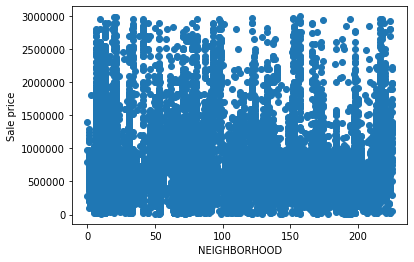

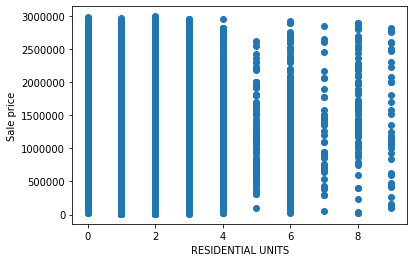

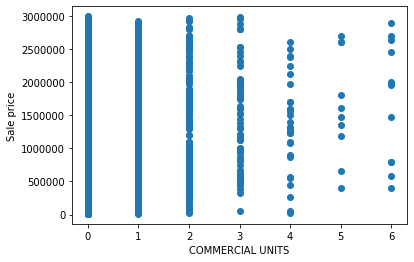

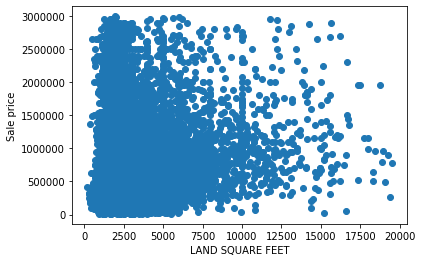

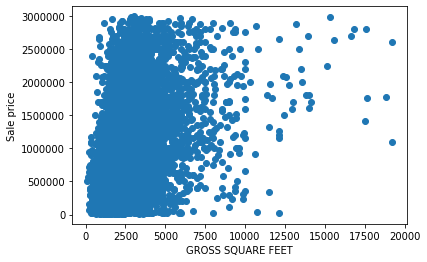

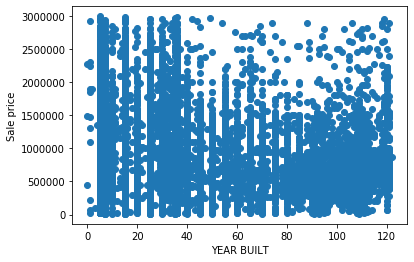

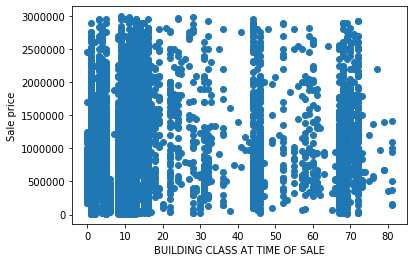

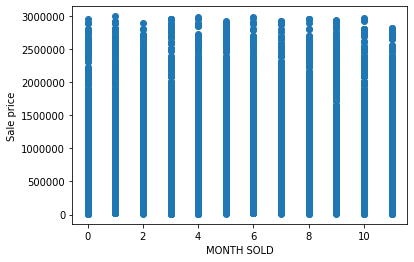

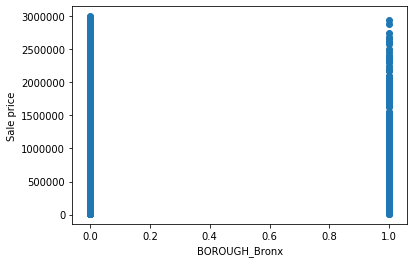

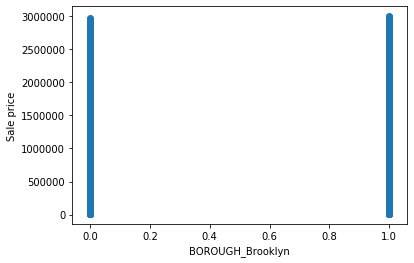

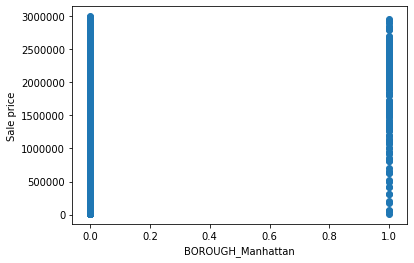

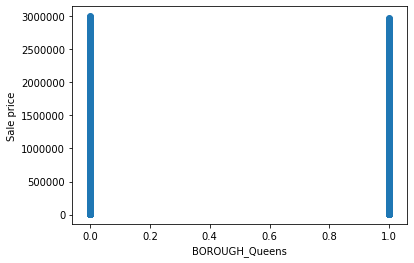

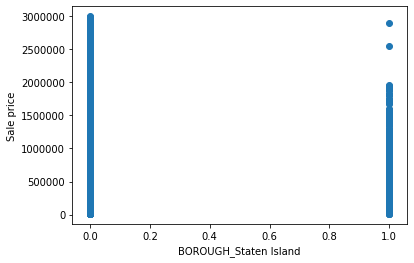

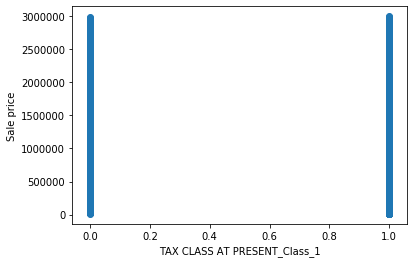

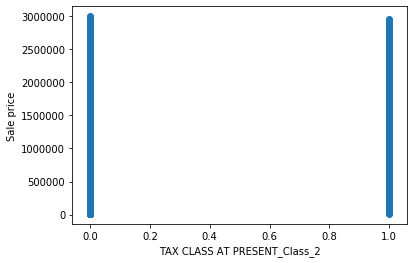

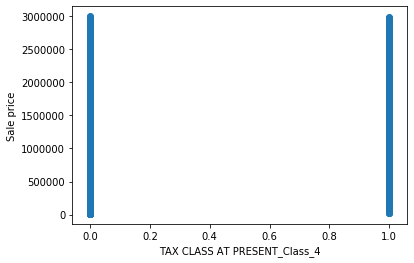

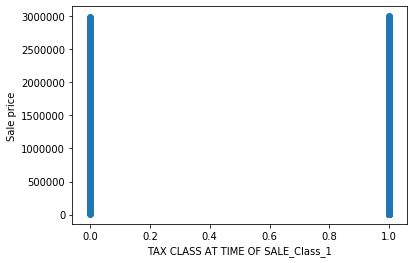

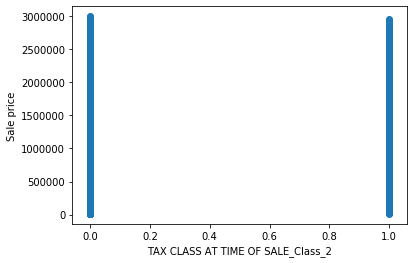

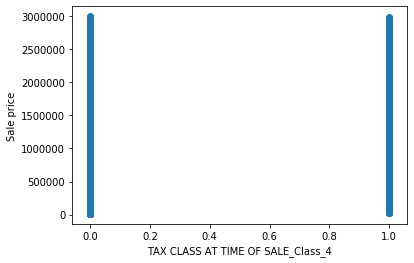

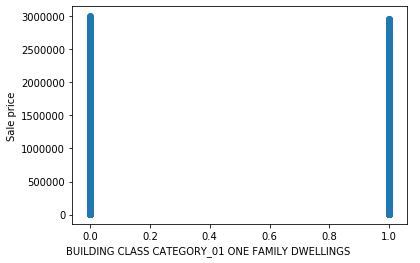

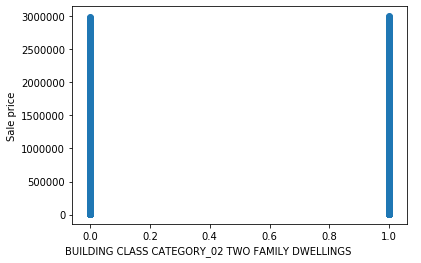

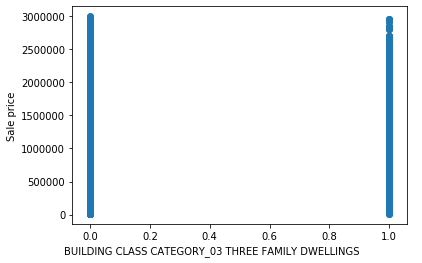

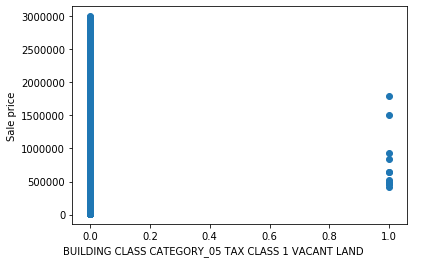

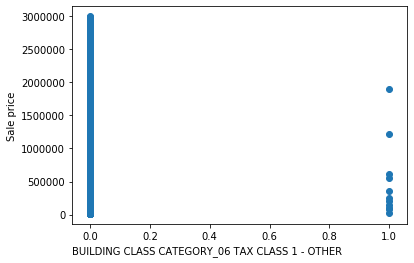

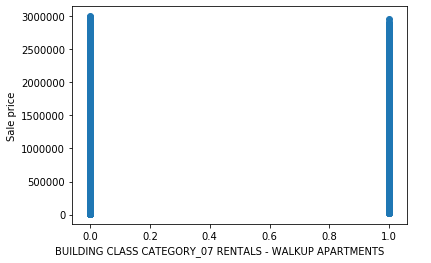

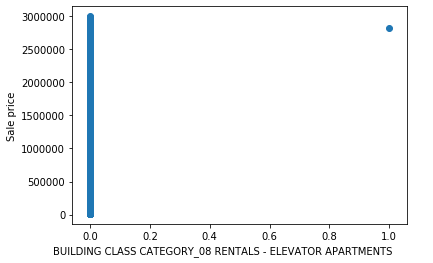

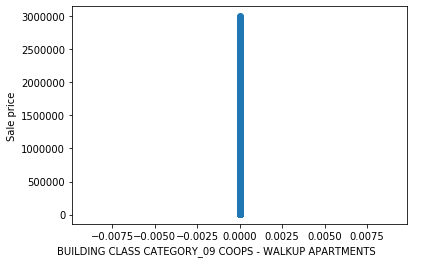

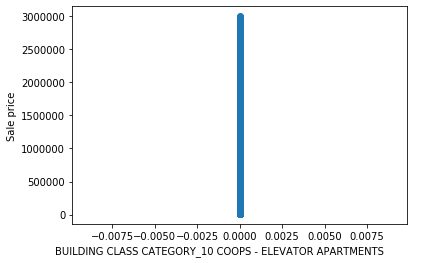

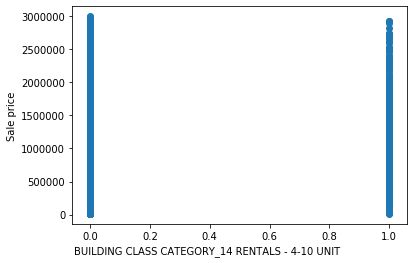

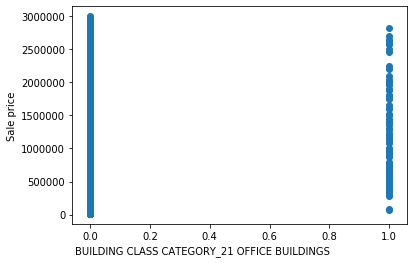

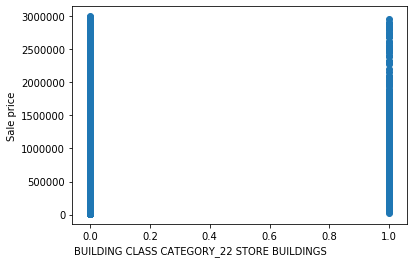

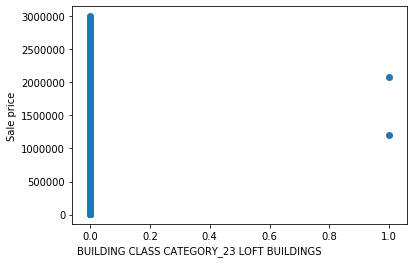

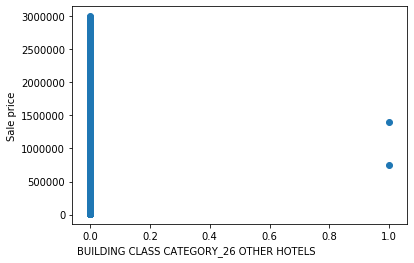

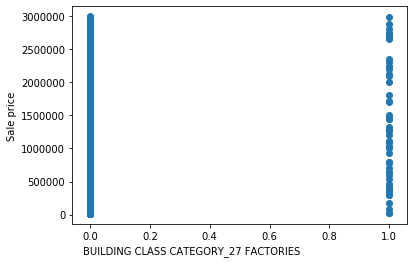

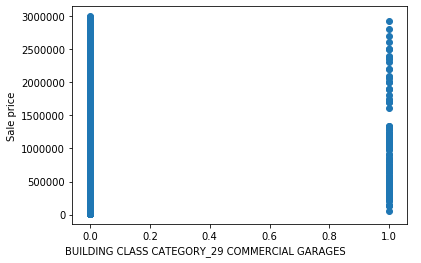

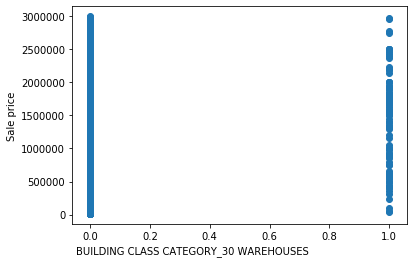

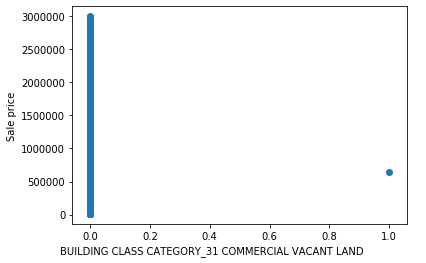

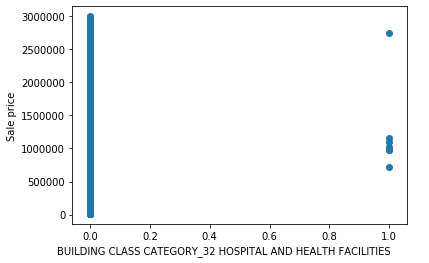

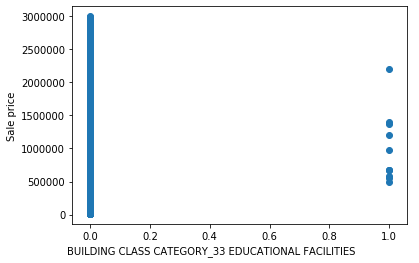

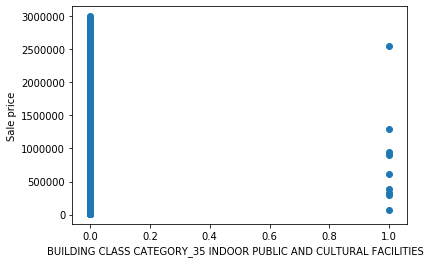

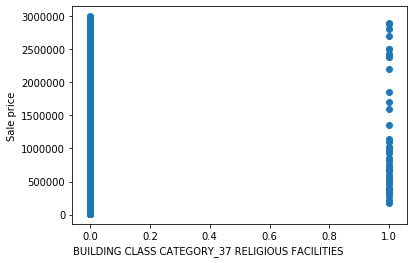

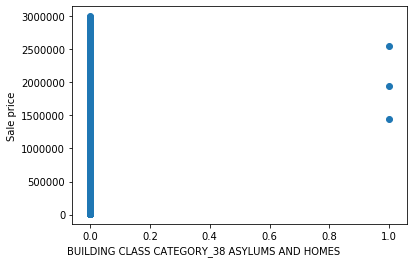

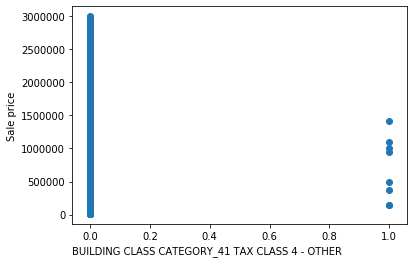

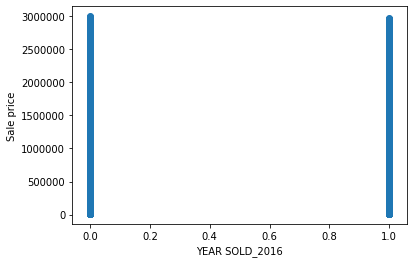

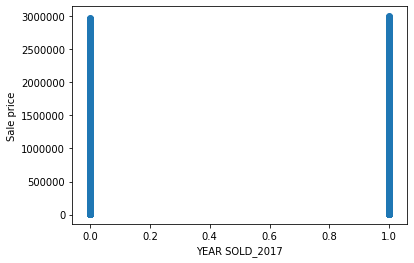

In [2604]:
scatter_df = df.drop(['SALE PRICE'], axis = 1) 

for col in scatter_df.columns:
    plt.scatter(scatter_df[col], df['SALE PRICE'])
    plt.ylabel('Sale price')
    plt.xlabel(col)
    plt.show()

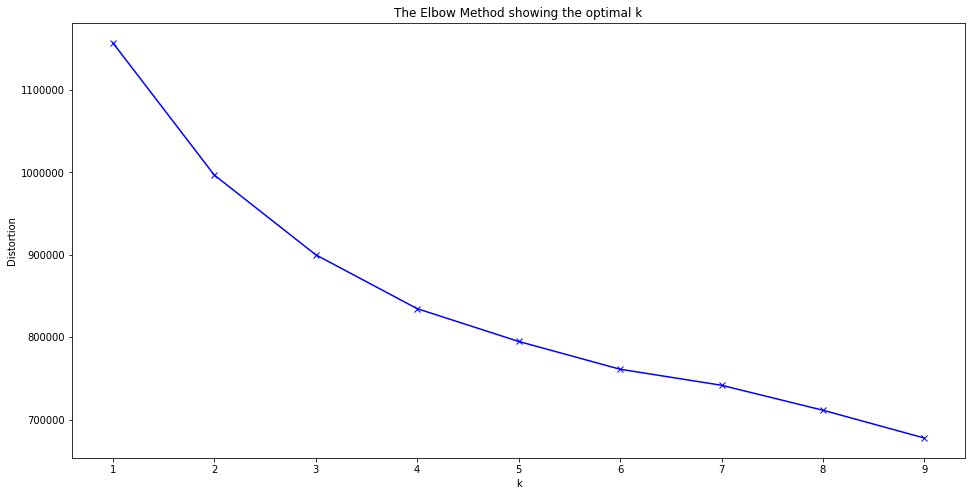

In [2605]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(standard_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

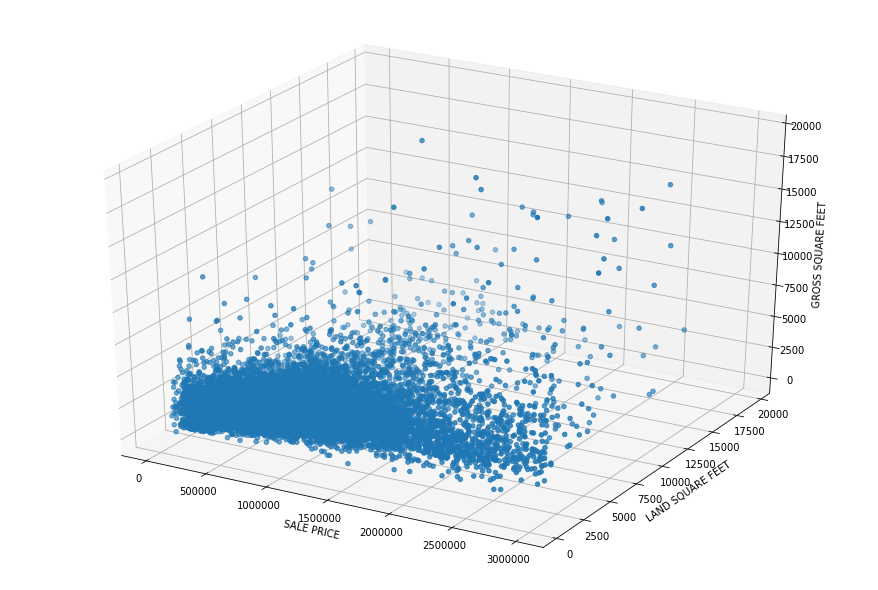

In [2606]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d', position=[2,2,2,2])

x = cluster_df['SALE PRICE']
y = cluster_df['LAND SQUARE FEET']
z = cluster_df['GROSS SQUARE FEET']

ax.scatter(x, y, z)
ax.set_xlabel("SALE PRICE")
ax.set_ylabel("LAND SQUARE FEET")
ax.set_zlabel("GROSS SQUARE FEET")

plt.show()

Text(0.5, 1.0, 'K_Means')

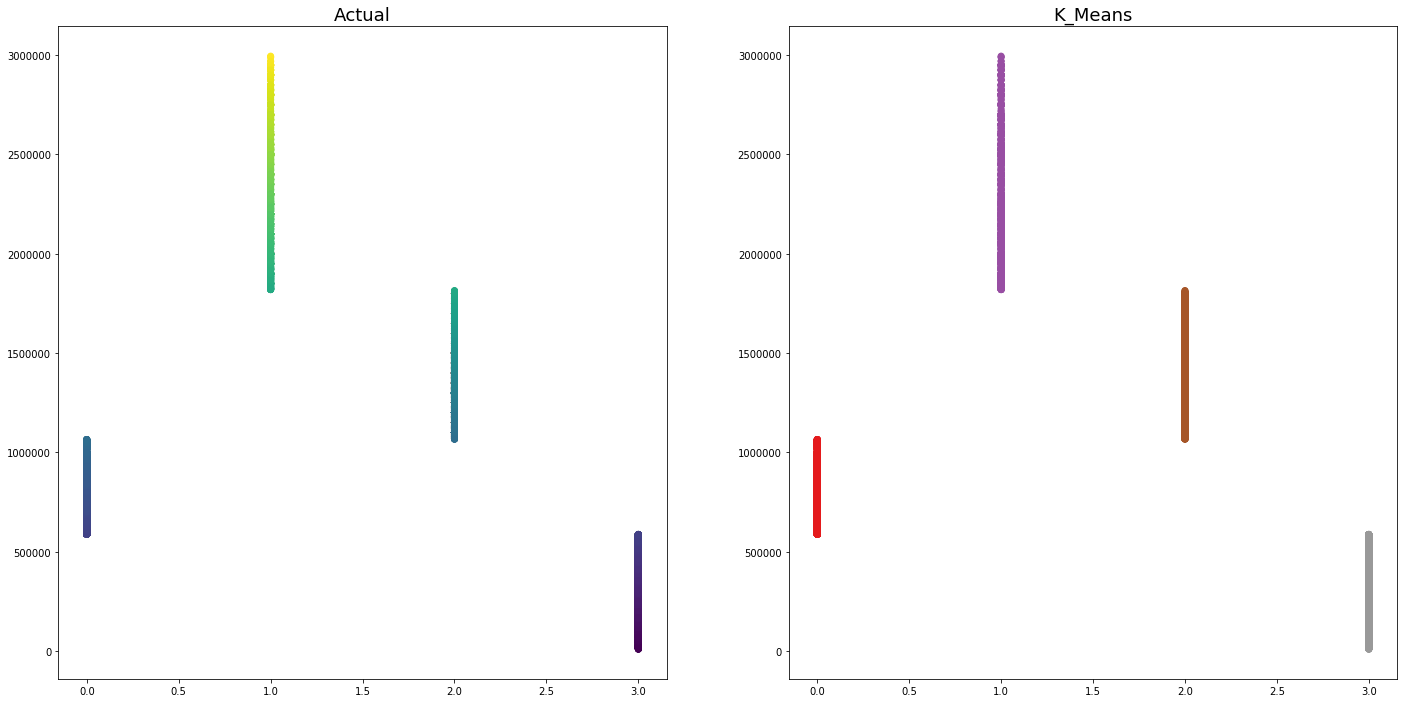

In [2607]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(cluster_df)

df['k_means'] = kmeanModel.predict(cluster_df)
df['target'] = cluster_df['SALE PRICE']

fig, axes = plt.subplots(1, 2, figsize=(24,12))
axes[0].scatter(df['k_means'], df['target'], c=df['target'])
axes[1].scatter(df['k_means'], df['target'], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)